In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

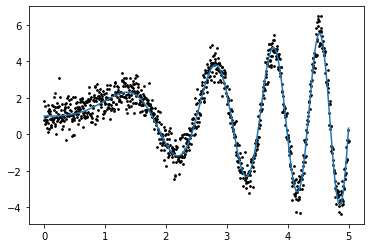

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

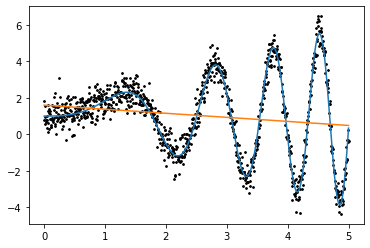

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [9]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression()

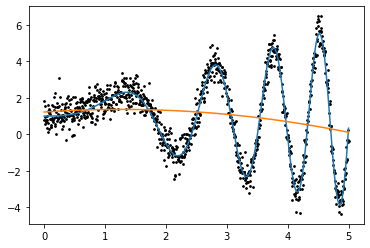

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

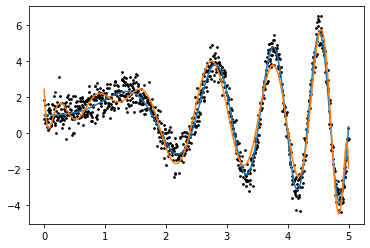

In [12]:
lr = LinearRegression()
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [14]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [15]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2451.344975405764, tolerance: 0.5589203026546135
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2454.192455363518, tolerance: 0.5589203026546135
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85524e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2370.0838116845734, tolerance: 0.5589203026546135
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2361.7624257260222, tolerance: 0.5589203026546135
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2353.133455223653, tolerance: 0.5589203026546135
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

In [16]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.903310,2.311497,1.926749
11,1.897209,2.313357,1.908366
12,1.645547,2.314028,1.907158
13,1.371050,2.313458,1.881180
14,1.354522,2.312298,1.688426
15,0.910234,2.310966,1.506517
16,0.716382,2.309732,1.515052
17,0.693801,2.308728,1.319254
18,0.716110,2.307975,0.897432


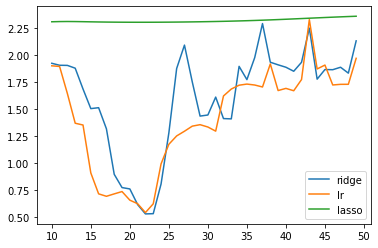

In [17]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [18]:
df.min()

lr_rmse       0.542903
lasso_rmse    2.306992
ridge_rmse    0.530408
dtype: float64

In [19]:
df["ridge_rmse"].sort_values().head()

poly_range
22    0.530408
23    0.532643
21    0.616764
20    0.761977
19    0.774604
Name: ridge_rmse, dtype: float64

In [20]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(fit_intercept=False)

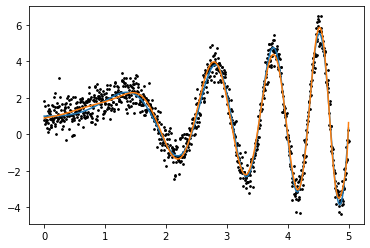

In [21]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

# Exercises problem

data from - https://onlinecourses.science.psu.edu/stat501/node/325

In [22]:
df = pd.read_csv("yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


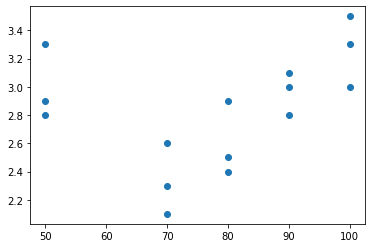

In [23]:
plt.scatter(df["Temp"], df["Yield"])
plt.show()

In [24]:
X = df["Temp"].values
y = df["Yield"].values

In [25]:
X.shape, y.shape

((15,), (15,))

In [26]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((15, 1), (15, 1))

In [27]:
poly_range = list(range(1, 10))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8872373208668618, tolerance: 0.012261
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1642235999144557, tolerance: 0.012261
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90408e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9831045287514

In [28]:
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df_poly = DataFrame(data).set_index("poly_range")
df_poly

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
1,0.364292,0.720297,0.467427
2,0.218597,0.481034,0.442254
3,0.196676,0.480895,0.248386
4,0.196638,0.460220,0.202434
5,0.196638,0.464953,0.200367
6,0.196638,0.468788,0.196639
7,0.196638,0.469746,0.196638
8,0.196638,0.469214,0.196638
9,0.196638,0.467693,0.196638


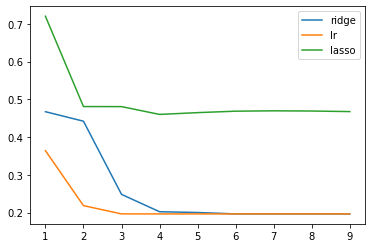

In [30]:
plt.plot(poly_range, df_poly["ridge_rmse"], label="ridge")
plt.plot(poly_range, df_poly["lr_rmse"], label="lr")
plt.plot(poly_range, df_poly["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [31]:
df_poly.min()

lr_rmse       0.196638
lasso_rmse    0.460220
ridge_rmse    0.196638
dtype: float64

In [32]:
df_poly["ridge_rmse"].sort_values().head()

poly_range
8    0.196638
9    0.196638
7    0.196638
6    0.196639
5    0.200367
Name: ridge_rmse, dtype: float64

In [33]:
poly_features = PolynomialFeatures(degree=7)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

C:\Users\pc1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42059e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(fit_intercept=False)

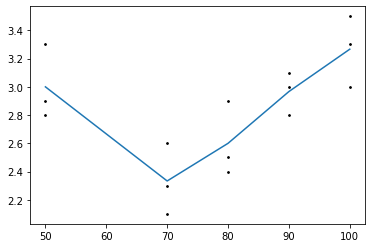

In [34]:
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()